# 心脏病数据分析

## 数据介绍

性别: 病人的性别

年龄:

exang: 是否为运行诱发的心绞痛 1 yes 0 no

ca: 还没搞懂

cp: 胸痛类型
- 1 典型心绞痛
- 2 非典型心绞痛
- 3 非心绞痛类型
- 4 无症状
    
trtbps: 平静时候血压值

chol: 通过 BMI 传感器获取的以 mg / dl 为单位的胆固醇

fbs: 空腹时候的血糖 是否大于120mg/dl

rest_ecg:静息时心电图
- 0 正常
- 1 有异常，只是不确定
- 2 确定有问题
    
thalach: 达到的最大心率

target: 0 表示心脏病发作几率减少 1 表示发作概率增加

## 任务说明

心脏病引发的原因：

- 主要是心脏部位供血供氧不足
- 如果是肥胖因素，胆固醇会积累成块状
- 当块体破裂，就会堵到心血管，然后引发心脏病

任务：通过分析数据，判断一个人是否有倾向于得心脏病

## 数据读取

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv('./data/heart.csv')

In [5]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
df.shape

(303, 14)

In [8]:
# check missing values
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

## 数据分析

In [52]:
# 查看一些常见的统计数据
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


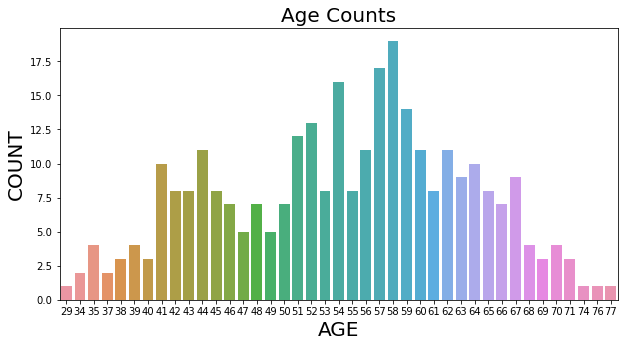

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["age"])
plt.title("Age Counts",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

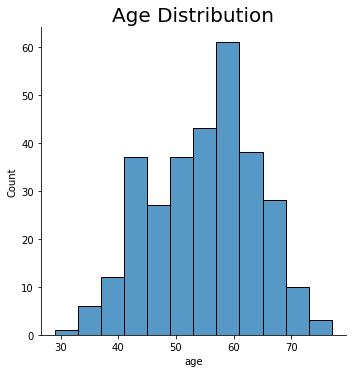

In [15]:
sns.displot(df["age"])
plt.title("Age Distribution",fontsize=20)
plt.show()

1. 可以发现数据中年龄分布大概呈现出正太分布的样子
2. 数据中年龄的分布在29-77岁之间

In [20]:
s=df["sex"].value_counts().reset_index()
px.pie(s ,names="index" ,values="sex")
# 数据介绍没有解释哪个是男性女性

cp: 胸痛类型
- 1 典型心绞痛
- 2 非典型心绞痛
- 3 非心绞痛类型
- 4 无症状

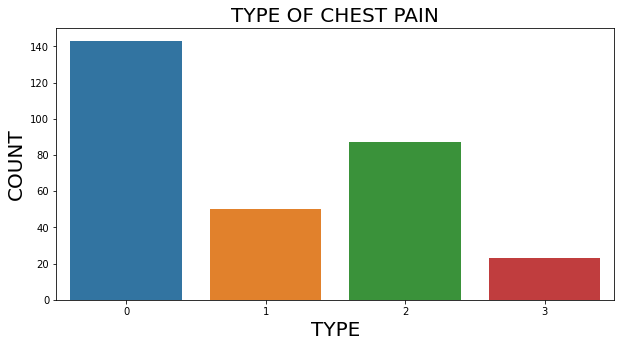

In [23]:
c=df["cp"].value_counts().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=c["index"],y=c["cp"])
plt.title("TYPE OF CHEST PAIN",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

可以发现数据中典型心绞痛类型数据居多

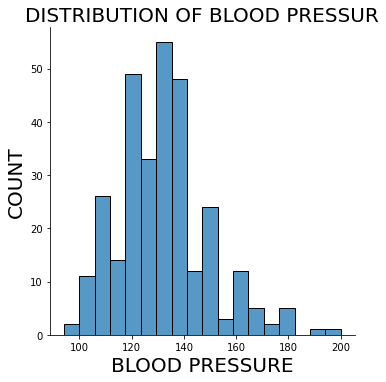

In [25]:
# 查看数据中血压的分布情况
sns.displot(df["trtbps"])
plt.title("DISTRIBUTION OF BLOOD PRESSUR",fontsize=20)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

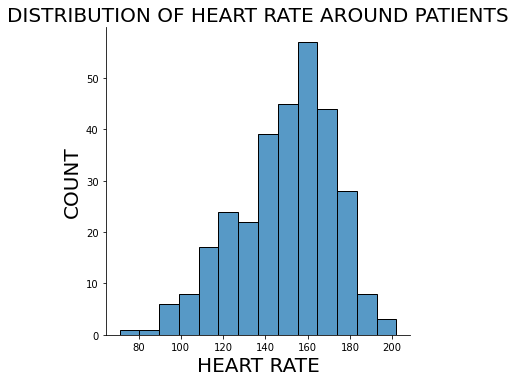

In [27]:
# 心跳次数人数分布图
sns.displot(df["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=20)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

通过以上的数据分析我们可以发现：
1. 大部分病人的年龄在50-60岁之间，其中56岁的发病人数最多
2. 整个数据中大约207名男性，96名女性
3. 大部分病人含有典型心绞痛，其他类型心绞痛比较少
4. 大部分人的血压值介于130-140之间
5. 大部分病人的胆固醇含量介于200-250之间
6. 大部分病人的心率介于155-165之间

In [28]:
# 双变量分析

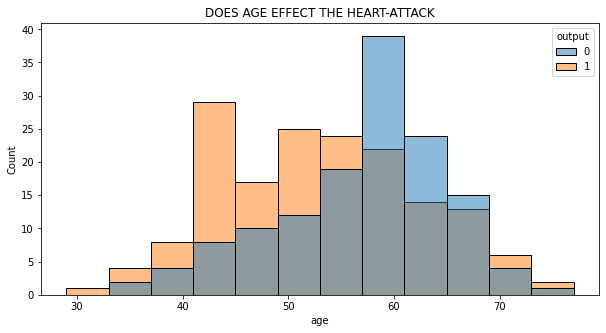

In [31]:
# 1表示发病几率增加，0表示发病几率减少
# 这里查看年龄是不是对发病几率有影响
# hue参数是表格中的输出标签
# 对age进行分别统计几率增加和减少的数量
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'age', hue = 'output')
plt.title("DOES AGE EFFECT THE HEART-ATTACK")
plt.show()

In [36]:
# 绘制交叉透视表
# 统计各个年龄中，发病几率增加和减少的数量
v=pd.crosstab(df["age"],df["output"]).reset_index()
v.head()

output,age,0,1
0,29,0,1
1,34,0,2
2,35,2,2
3,37,0,2
4,38,1,2


In [37]:
# 绘制发病率增高随着年龄的变化曲线
v.columns=["age","low_risk","high_risk"]
px.line(v, v["age"], v["high_risk"], title="RISK OF HIGH HEART-ATTACK WITH AGE")

In [38]:
# 绘制发病率降低随年龄的变化曲线
px.line(v, v["age"], v["low_risk"], title="RISK OF LOW HEART-ATTACK WITH AGE")

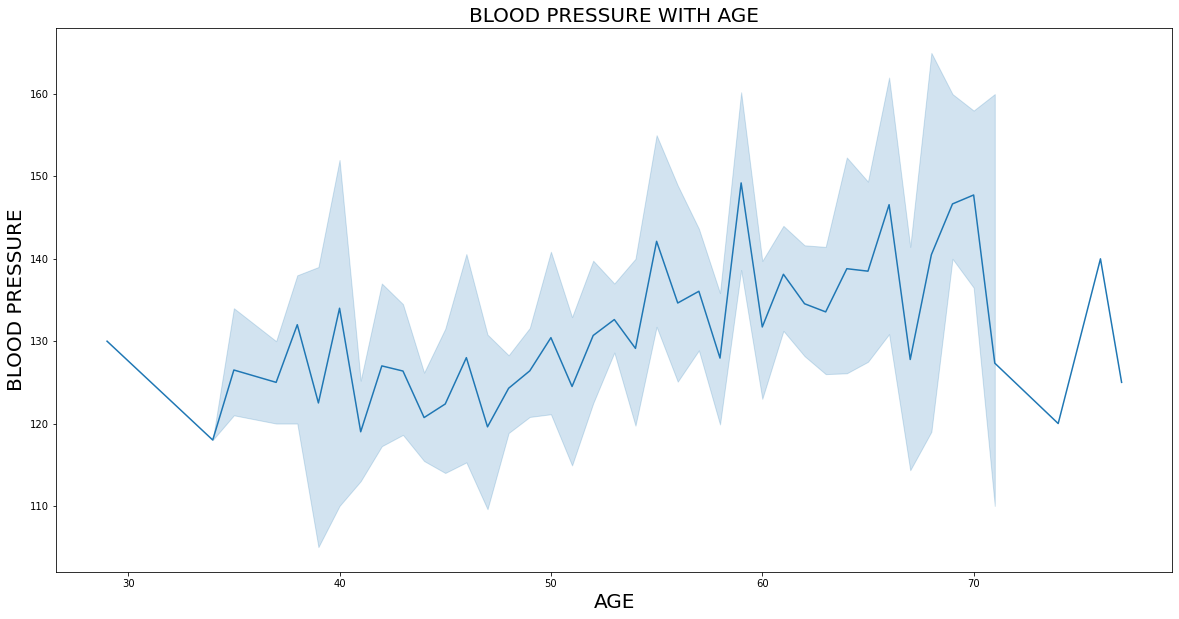

In [39]:
# 血压值随着年龄的变化曲线图
plt.figure(figsize=(20,10))
sns.lineplot(y="trtbps",x="age",data=df)
plt.title("BLOOD PRESSURE WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("BLOOD PRESSURE",fontsize=20)
plt.show()

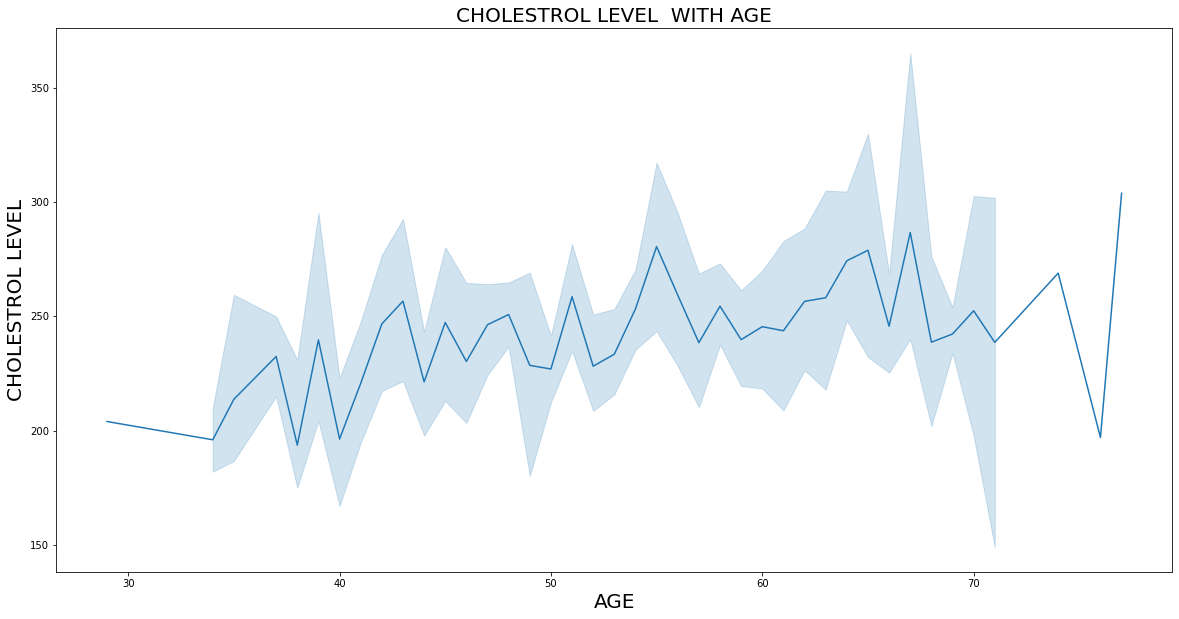

In [41]:
# 胆固醇含量随年龄的变化
plt.figure(figsize=(20,10))
sns.lineplot(y="chol",x="age",data=df)
plt.title("CHOLESTROL LEVEL  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("CHOLESTROL LEVEL",fontsize=20)
plt.show()

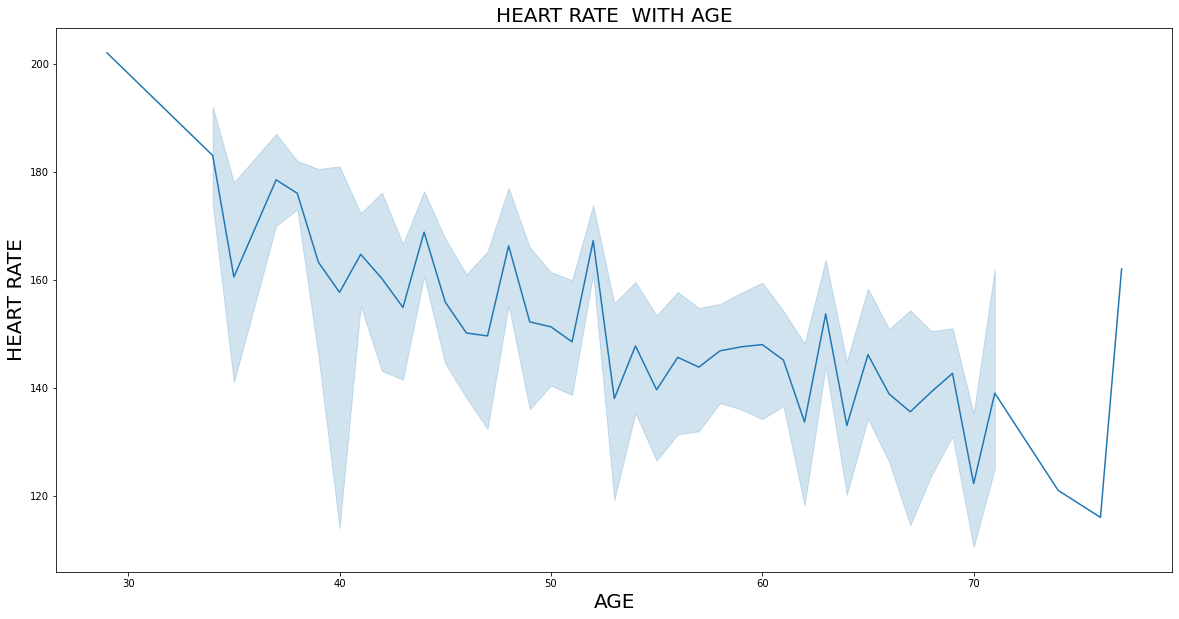

In [42]:
# 心率随着年龄的变化曲线
plt.figure(figsize=(20,10))
sns.lineplot(y="thalachh",x="age",data=df)
plt.title("HEART RATE  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("HEART RATE",fontsize=20)
plt.show()

通过上面的双变量分析可以得出下面结论：
- 年龄和心脏病发作并没有很强烈的关系。所以我们不能说明心脏病发作的几率随着年龄的增加而增加。
- 血压值会随着年龄的增加而增加
- 随着年龄的增加，胆固醇的含量会越来越多
- 随着年龄的增加，心率也会越来越高

In [43]:
# 多变量分析

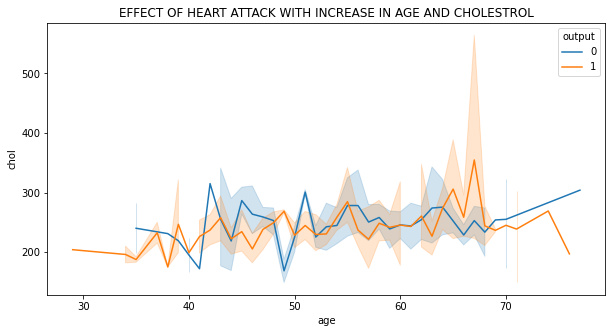

In [44]:
# 不同发病几率中，胆固醇含量随着年龄的变化曲线
plt.figure(figsize=(10,5))
sns.lineplot(x="age",y="chol",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTROL")
plt.show()

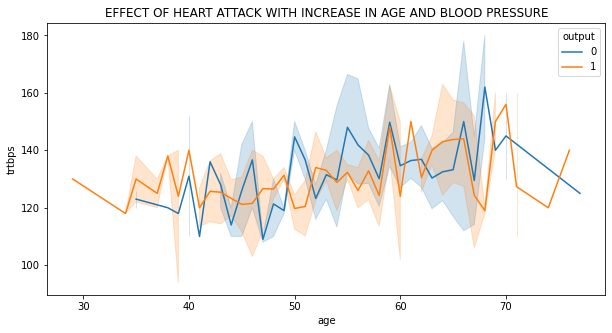

In [46]:
# 不同发病率中，血压值随着年龄的变化曲线
plt.figure(figsize=(10, 5))
sns.lineplot(x="age",y="trtbps",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND BLOOD PRESSURE")
plt.show()

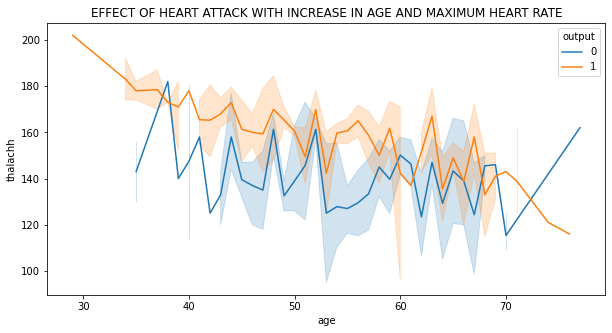

In [47]:
# 不同发病率中， 心率增高随年龄的变化曲线
plt.figure(figsize=(10, 5))
sns.lineplot(x="age",y="thalachh",hue="output",data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
plt.show()

<AxesSubplot:>

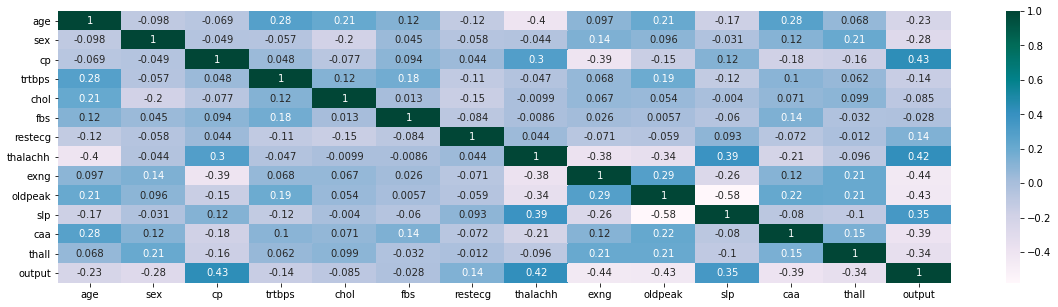

In [49]:
# 相关系数热力图
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

- 颜色越深表示正相关性越高
- 颜色越浅表示负相关性越高

多变量分析结果：
- 随着年龄的增加，人体的胆固醇含量确实越来越高，但是胆固醇的含量与心脏病发病几率提升并没有直接的关系
- 血压越高，越容易引起心脏病
- 心率越高，越容易引起心脏病

# 算法分析

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [56]:
df1 = df
# 连续变量和离散变量
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

In [57]:
X = df1.drop(['output'],axis=1)
y = df1[['output']]

In [61]:
# 因为不同变量的量纲是不一样的，所以这里要归一化处理
scaler = MinMaxScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## SVM模型

In [65]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8524590163934426


/home/zwl/miniconda3/envs/asr/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## 逻辑回归模型

In [68]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8852459016393442


/home/zwl/miniconda3/envs/asr/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [76]:
df1.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_1',
       'exng_1', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'slp_1', 'slp_2', 'thall_1',
       'thall_2', 'thall_3'],
      dtype='object')

In [78]:
logreg.coef_[0] # 查看重要特征

array([-0.01726531, -0.79674967, -0.26524386,  0.6406513 , -1.2873269 ,
       -1.10184357, -0.93917524, -1.6337265 , -1.91611449, -1.17873931,
        0.50223737,  0.60874105,  1.2435997 ,  1.27666081,  0.29480814,
        0.36206695, -0.21636337, -0.40651962,  0.8563009 ,  0.10077196,
        0.59232249, -0.74041946])

## 决策树模型

In [67]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


In [92]:
X.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex_1', 'exng_1',
       'caa_1', 'caa_2', 'caa_3', 'caa_4', 'cp_1', 'cp_2', 'cp_3', 'fbs_1',
       'restecg_1', 'restecg_2', 'slp_1', 'slp_2', 'thall_1', 'thall_2',
       'thall_3'],
      dtype='object')

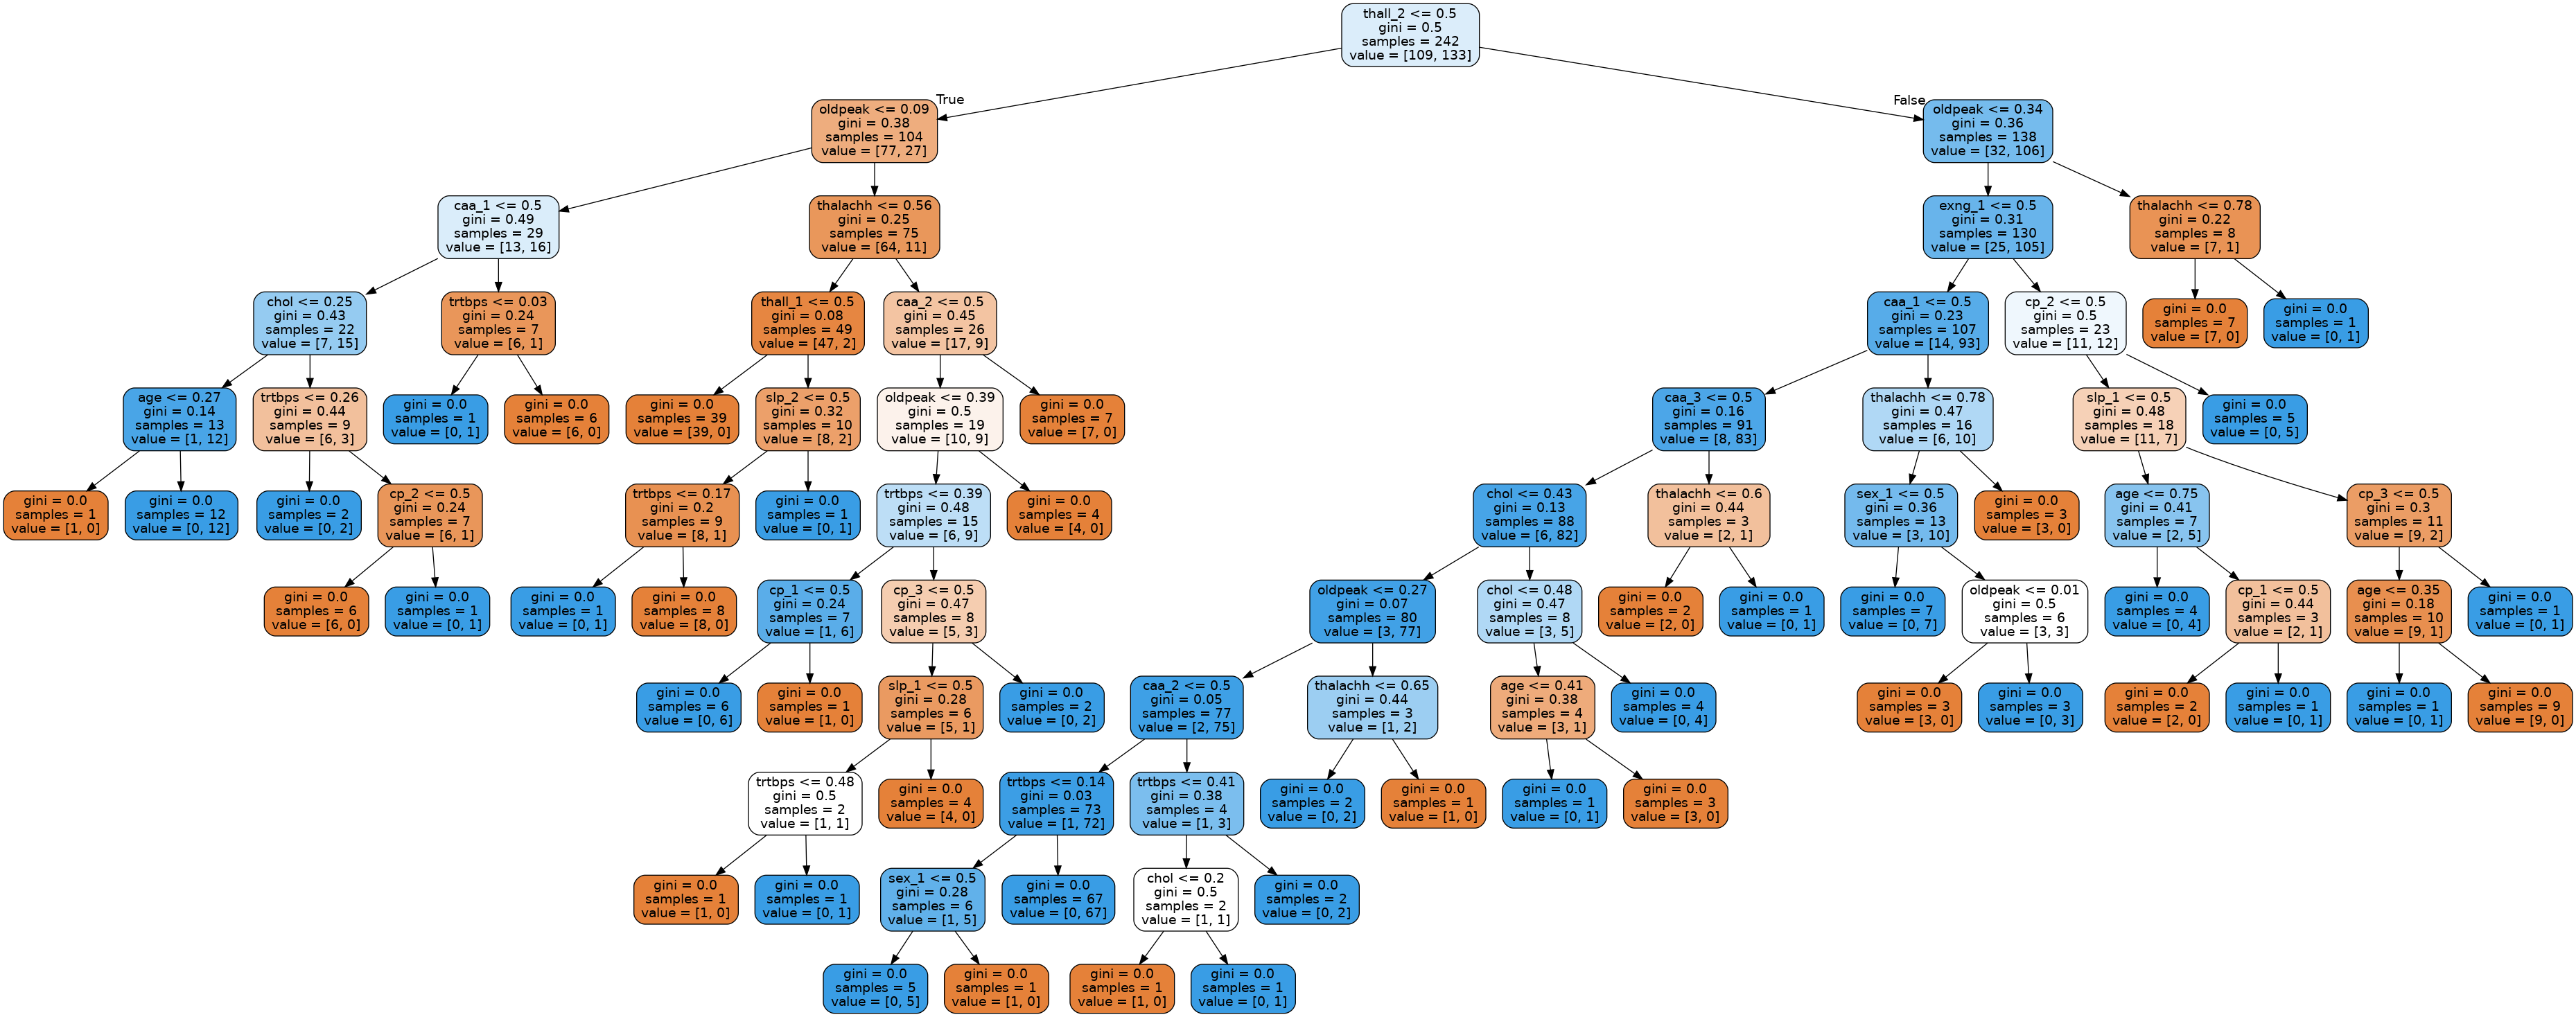

In [91]:
# 决策树可视化
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

dot_data = export_graphviz(dt,
               feature_names =X.columns,
               ##class_names =df1.output,
               rounded = True, proportion =False,
               precision = 2, filled = True,
               )
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

# 结论

1. 年龄和心脏病发病几率增高并没有很强的关系
2. 心率越高越容易引发心脏病
3. 血压越高越容易引发心脏病
4. 胆固醇含量越高越容易引发心脏病